* 텐서플로우로 분류 모델 만들기
* [첫 번째 신경망 훈련하기: 기초적인 분류 문제  |  TensorFlow Core](https://www.tensorflow.org/tutorials/keras/classification)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X, y = data.data, data.target
X.shape, y.shape

((569, 30), (569,))

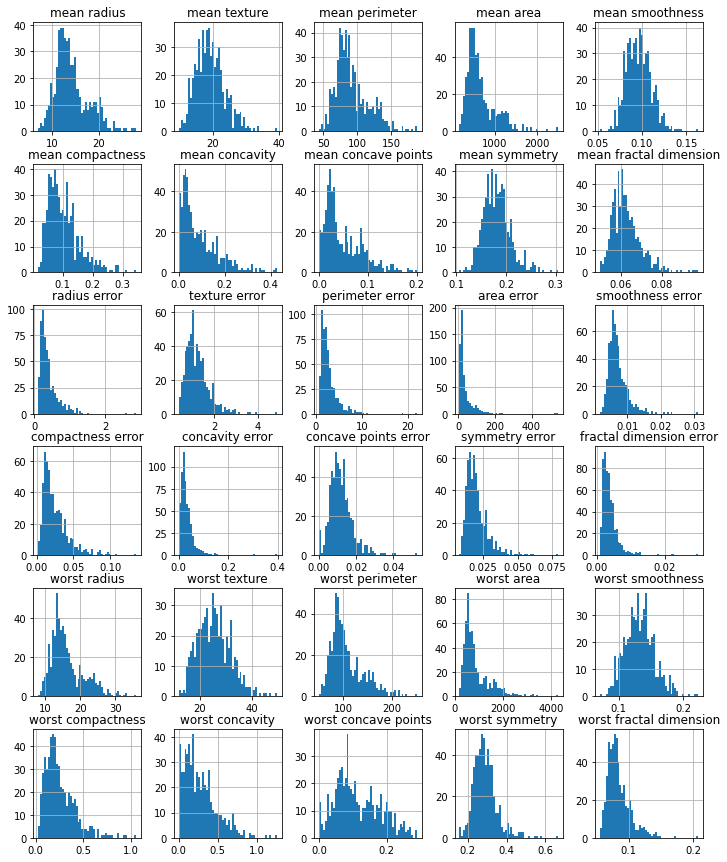

In [16]:
df = pd.DataFrame(X, columns=data.feature_names)
df.hist(figsize=(12, 15), bins=50)
plt.show()

In [4]:
# 학습세트와 예측세트를 분리합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

<img src="https://cs231n.github.io/assets/nn1/neural_net2.jpeg" width="40%">

* 이미지 출처 : https://cs231n.github.io/neural-networks-1/

In [5]:
input_shape = X_train.shape[1]
input_shape

30

In [ ]:
import tensorflow as tf
seed = 42
tf.random.set_seed(seed)

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(input_shape)),
  tf.keras.layers.Dense(256, activation='swish'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='swish'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 40,961
Trainable params: 40,961
Non-trainable params: 0
_________________________________________________________________


## 학습

In [9]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(X_train, y_train, 
          epochs=100,
          use_multiprocessing=True,
          callbacks=[early_stop],
          verbose=0)

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
56,0.282375,0.889671,56
57,0.295555,0.889671,57
58,0.334919,0.877934,58
59,0.270894,0.887324,59
60,0.275350,0.887324,60


## 예측

In [11]:
y_pred = model.predict(X_test)
y_pred[0]

array([0.23231658], dtype=float32)

## 평가

In [12]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

5/5 - 0s - loss: 0.1926 - accuracy: 0.9371

테스트 정확도: 0.9370629191398621


In [13]:
y_predict = (y_pred.flatten() > 0.5).astype(int)
y_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

## Accuracy 

In [14]:
(y_test == y_predict).mean()

0.9370629370629371